## 군집 평가
- 대부분의 군집화 dataset은 target label을 가지고 있지 않음 => 비지도학습
- 데이터 내의 숨어 있는 별도의 그룹을 찾아서 의미를 부여
- 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구
- 군집화를 평가하는 대표적인 지표 : 실루엣 분석
### 실루엣(Silhouette) 분석
- 군집 내의 응집도와 군집 간 분리도를 이용한 지표
- -1 ~ 1사이의 값
- 1에 가까울 수록 → 완벽한 군집화가 이루어졌을 경우
- -1에 가까울 수록 → 군집화가 전혀 이루어지지 않은 경우


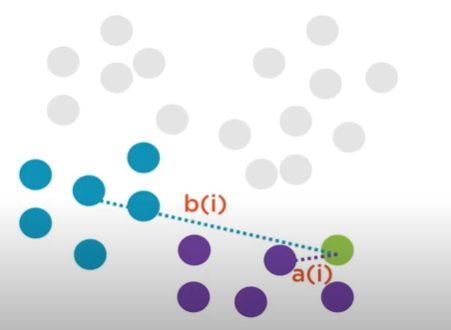

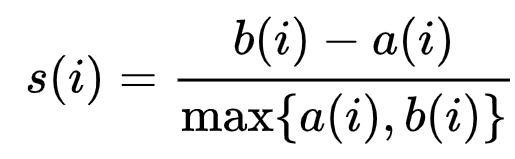

- a(i) : i번째 개체와 같은 군집에 속한 요소들 간 거리들의 평균
- b(i) : i번째 개체와 속하지 않은 군집 중 가장 가까운 군집 요소들 간 거리들의 평균
- 두 군집간의 거리가 얼마나 떨어져 있는가 => b(i) - a(i)
- 값을 정규화 하기위해 Max{b(i),a(i)} 나누어 줌


## 사이킷런은 이러한 실루엣 분석을 위해 제공하는 method
- sklearn.metrics.silhouette_samples(x, labels, metric='euclidean', **kwds): 인자로 x feature dataset과 각 feature dataset이 속한 군집 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산하여 반환
- sklearn.metrics.silhouette_score(x, labels, metric='euclidean', sample_size=None, **kwds): 인자로 x feature dataset과 각 feature dataset이 속한 군집 label 데이터를 입력해주면 전체 데이터의 실루엣 계수 값을 평균해 반환
    - np.mean(silhouette_samplesa())를 의미
    - 일반적으로 이 값이 높을수록 군집화가 어느정도 잘 됬다고 판단(무조건은 아님)


### 좋은 군집화가 되기 위한 기준 조건
- 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score() 값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋다.
- 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다.
- 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요


붓꽃(Iris) 데이터 셋을 이용한 클러스터 평가


In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)


silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


평균 실루엣 계수 값이 약 0.553



## 군집 별로 평균 실루엣 계수 값


In [2]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()


cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

1번 군집의 실루엣 계수 평균 값이 약 0.79인 반면, 나머지 군집의 실루엣 계수 평균 값이 1번에 비해 상대적으로 낮다. => 3개의 군집은 좋아 보이지 않음

### 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
- 사이킷런 문서중 K-평균의 적절한 군집 개수 시각화 방법
- 위 사이트 문서의 소스에서 필요한 부분만 visualize_silhouette 함수로 작성 활용
- 각 데이터 별로 다른 데이터와의 거릴를 반복적으로 계산해야 하므오 데이터 양이 늘어나면 수행 시간이 크게 늘어남
- 군집별로 임의의 데이터를 샘플링하여 실루엣 계수를 평가하는 방안을 고민

### 첫 번째 경우 : 군집의 개수 2개
- 평균 실루엣 계수는 약 0.704로 매우 높음
- 1번 군집의 모든 데이터는 평균 실루엣 계수 값 이상
- 0번 군집의 경우는 평균보다 적은 데이터 값이 매우 많음
- 1번 군집에 비해 0번 군집은 내부 데이터끼리 많이 떨어져 있는 모습


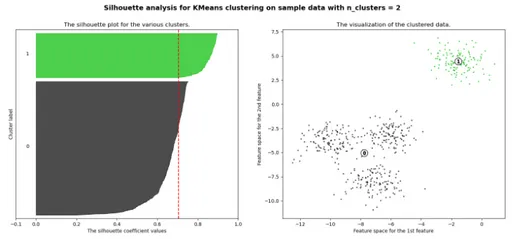

### 두 번째 경우 : 군집의 개수 3개
- 전체 데이터의 평균 실루엣 값이 약 0.588
- 1번, 2번 군집의 경우 평균보다 높은 실루엣 계수 값
- 0번의 경우 모두 평균보다 낮음
- 0번 군집은 내부 데이터끼리 많이 떨어져 있는 모습


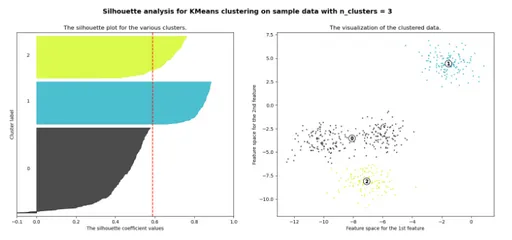

### 세 번째 경우 : 군집의 개수 4개
- 전체 데이터의 평균 실루엣 값이 약 0.65
- 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치
- 1번 군집의 경우 모든 데이터가 평균보다 높은 계수 값
- 0번, 2번 군집은 절반 이상이 평균보다 높음
- 3번 군집은 1/3 이상이 평균보다 높은 계수 값


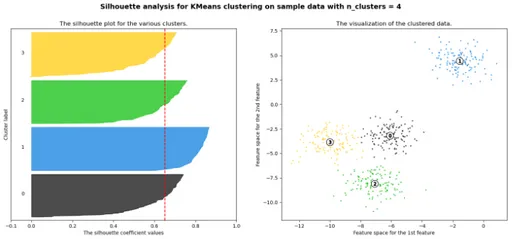

2개의 군집으로 정한 경우보다 평균 실루엣 계수 값은 작지만 4개의 군집으로 정한 경우가 가장 이상적인 군집화 개수로 판단 됨



In [3]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


## make_blobs()통한 데이터 셋


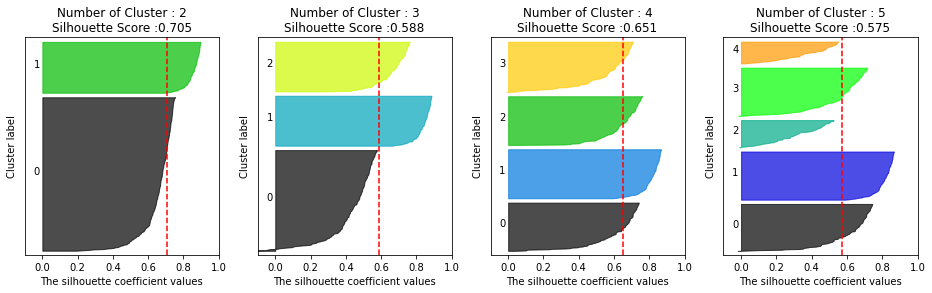

In [5]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)


### iris dataset

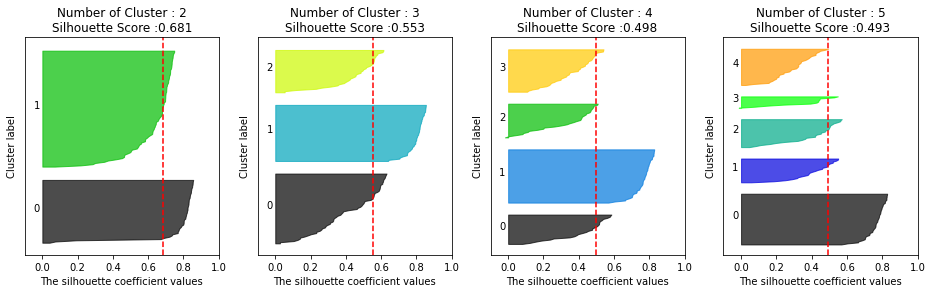

In [7]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)


2개의 군집 개수를 사용하는 것이 가장 좋아보임